# LinearRegression building from scratch 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

$$1. straight-line-equation : Y = mX + b $$

$$2. To-find- m = \frac{n\sum xy{} - \sum x\sum y}{n\sum_{}x^{2} - (\sum_{}x^{})^2}$$

 $$3. For-bais-b : b = \frac{\sum_{}y^{} - m\sum_{}x^{}}{n}$$

$$4. error = \sum_{}(ypred - yorg)^2{}$$

In [26]:
class LinearRegression:
    def __init__(self,data):
        self.data = pd.DataFrame(data)
        self.data['XY'] = self.data['X'] * self.data['Y']
        self.data['X2'] = self.data['X'] ** 2
        self.n = len(self.data)
        self.sum_x = self.data['X'].sum()
        self.sum_y = self.data['Y'].sum()
        self.sum_xy = self.data['XY'].sum()
        self.sum_x2 = self.data['X2'].sum()
        
    def display(self):
        return self.data
    
    def summ(self):
        return self.sum_x,self.sum_y,self.sum_xy,self.sum_x2,self.n
    
    def m(self):
        numerator_m = self.n * self.sum_xy - (self.sum_x * self.sum_y)
        denominator_m = self.n * self.sum_x2 - (self.sum_x)**2
        self.m = numerator_m / denominator_m
        return self.m
    
    def b(self):
        self.b = (self.sum_y - self.m * self.sum_x) / self.n
        return self.b
    
    def y_data_test(self):
        self.y_data = [self.m * x + self.b for x in self.data['X']]
        return self.y_data
    
    def fy_data(self,input):
        self.f_data = list(input)
        self.predict_data = [self.m * i + self.b for i in input]
        return self.predict_data , self.f_data
    
    def plot(self):
        # for merging two lists in one list
        x = [*self.data['X'] , *self.f_data]
        y = self.y_data + self.predict_data
        print(x , y)
        plt.figure(figsize=(9,5))
        plt.scatter(self.data['X'],self.data['Y'])
        plt.plot(x , y  ,c='r')
        plt.scatter(x = self.f_data , y = self.predict_data ,c='r')
        plt.title('LinearRegression',c = 'r')
        plt.xlabel('Independent points')
        plt.ylabel('Dependent points')
        plt.show()
         
    def error(self):
        err = sum([(yp - yo) **2 for yp,yo in zip(self.y_data , self.data['Y'])])
        return err


In [27]:
x = [i for i in range(1,8)]
y = [1.5,3.8,6.7,9.0,11.2,13.6,16]

In [28]:
data = {
    'X':x,
    'Y':y
}

In [29]:
lr = LinearRegression(data)
lr.display()

,X,Y,XY,X2
0,1,1.5,1.5,1
1,2,3.8,7.6,4
2,3,6.7,20.1,9
3,4,9.0,36.0,16
4,5,11.2,56.0,25
5,6,13.6,81.6,36
6,7,16.0,112.0,49


In [30]:
lr.summ()

(28, 61.800000000000004, 314.8, 140, 7)

In [31]:
lr.m()

2.4142857142857133

In [32]:
lr.b()

-0.8285714285714231

In [33]:
lr.y_data_test()

[1.5857142857142903,
 4.0000000000000036,
 6.414285714285717,
 8.82857142857143,
 11.242857142857142,
 13.657142857142857,
 16.07142857142857]

In [35]:
lr.fy_data([8,9,10,11,12])

([18.485714285714284,
  20.9,
  23.31428571428571,
  25.728571428571424,
  28.14285714285714],
 [8, 9, 10, 11, 12])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] [1.5857142857142903, 4.0000000000000036, 6.414285714285717, 8.82857142857143, 11.242857142857142, 13.657142857142857, 16.07142857142857, 18.485714285714284, 20.9, 23.31428571428571, 25.728571428571424, 28.14285714285714]


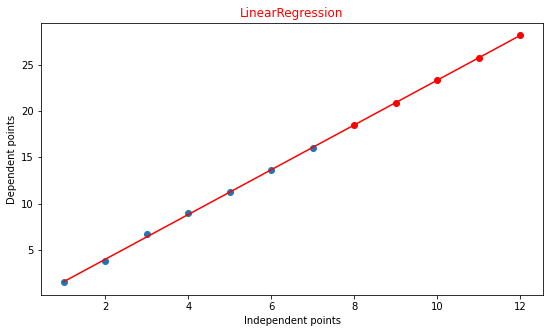

In [36]:
lr.plot()

In [37]:
lr.error()

0.16857142857142873